# HOUSE PRICING: Cross-validation, Competicion ML y Hiperparametros

TAREA: REGRESIÓN
NIVEL: INTERMEDIATE
Vamos a realizar un torneo de modelos con algunos modelos de regresión. Para ello utilizaremos un dataset de precios de propiedades en Ames, Iowa.

# Load Data, Functions and Libreries

In [ ]:
import numpy as np
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from random import random

# Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from scipy import stats

# Evaluacion
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

#Tamño default de los plots
plt.rcParams["figure.figsize"] = [10,6]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

El dataset House_Pricing contiene datos de compra-venta de viviendas en Ames, Iowa recopilados por una agencia inmobiliaria:

Precio (dolares)
Area vivienda (m2)
Antiguedad vivienda (años)
Numero de Habitaciones
Numero de Dormitorios
Ingresos promedio de la zona (dolares)
Densidad poblacional (hab/km2)

In [ ]:
ruta= '/content/Copia de House_Pricing_Ames (1).csv'
df = pd.read_csv(ruta, sep=',')
df

,PRECIO,AREA,ANTIGUEDAD,HABITACIONES,DORMITORIOS,INGRESOS_ZONA,POBLACION_ZONA
0,317710.2,243.18,5.68,7.0,4.0,79545.46,23086.80
1,451767.3,234.83,6.00,7.0,3.0,79248.64,40173.07
2,317696.4,288.28,5.87,9.0,5.0,61287.07,36882.16
3,378185.1,200.50,7.19,6.0,3.0,63345.24,34310.24
4,189282.9,268.08,5.04,8.0,4.0,59982.20,26354.11
...,...,...,...,...,...,...,...
4995,318058.2,217.02,7.83,6.0,3.0,60567.94,22837.36
4996,444785.4,230.20,7.00,7.0,4.0,78491.28,25616.12
4997,309219.0,177.05,7.25,5.0,2.0,63390.69,33266.15
4998,359597.1,246.81,5.53,7.0,5.0,68001.33,42625.62


# HEATMAP

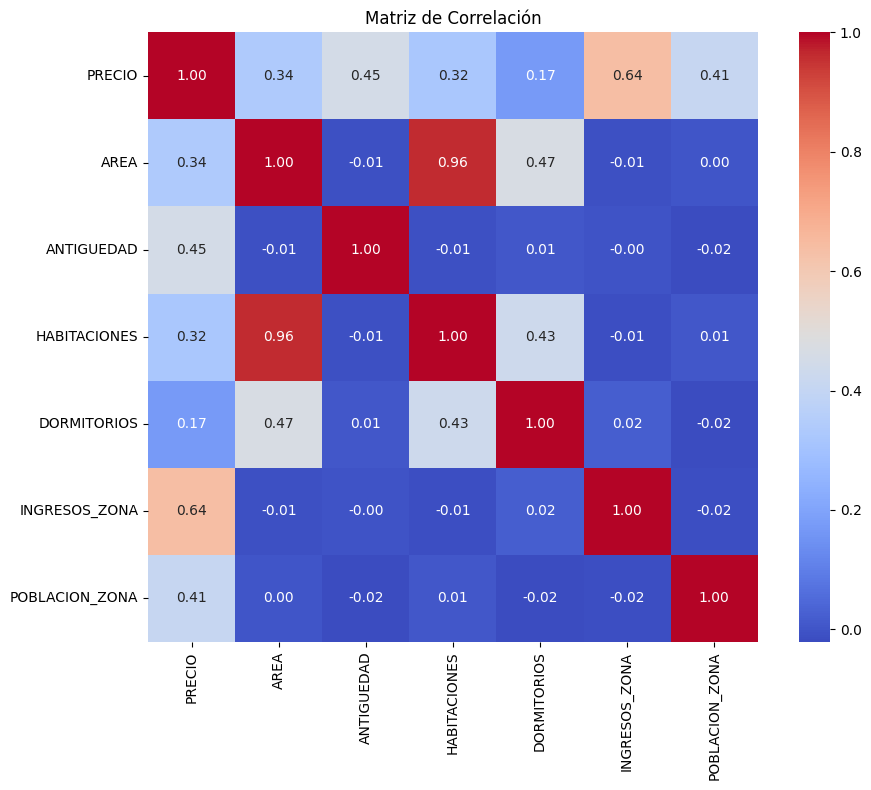

In [ ]:
import numpy as np
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

ruta= '/content/Copia de House_Pricing_Ames (1).csv'
df = pd.read_csv(ruta, sep=',')

def correlacion_heatmap(df):
    corr = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Matriz de Correlación")
    plt.tight_layout()
    plt.savefig("heatmap.png", dpi=300)
    plt.show()

correlacion_heatmap(df)

# MATRIX PLOT




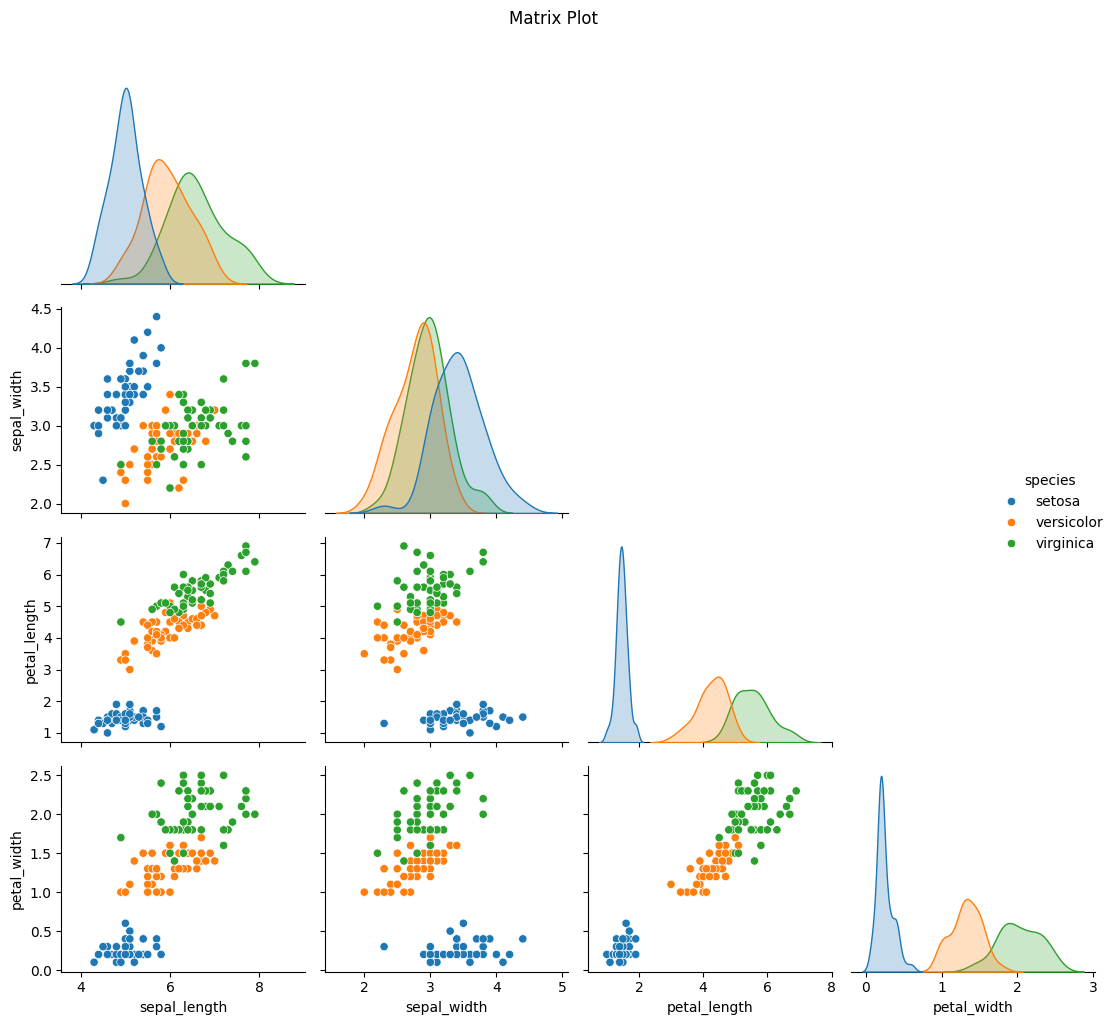

In [ ]:
#https://www.kaggle.com/code/anantpandey29/complete-seaborn-guide-on-iris-dataset

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')

plot = sns.pairplot(df, hue='species', corner=True)
plot.fig.suptitle("Matrix Plot", y=1.02)
plot.fig.tight_layout()
plot.fig.savefig("matrix_plot.png", dpi=300, bbox_inches='tight')

plt.show()

# MATRIX PLOT


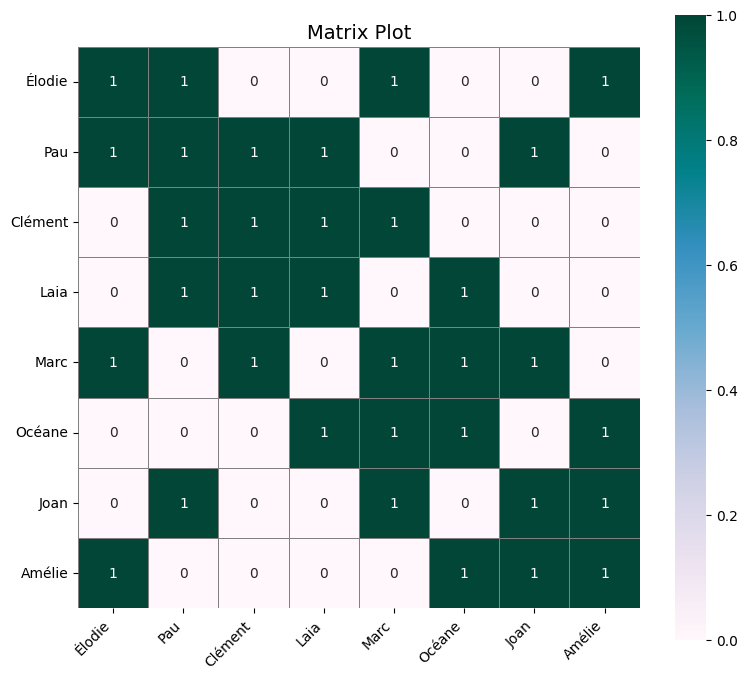

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

usuarios = ["Élodie", "Pau", "Clément", "Laia", "Marc", "Océane", "Joan", "Amélie"]
relaciones = {
    "Élodie":   [1, 1, 0, 0, 1, 0, 0, 1],
    "Pau":      [1, 1, 1, 1, 0, 0, 1, 0],
    "Clément":  [0, 1, 1, 1, 1, 0, 0, 0],
    "Laia":     [0, 1, 1, 1, 0, 1, 0, 0],
    "Marc":     [1, 0, 1, 0, 1, 1, 1, 0],
    "Océane":   [0, 0, 0, 1, 1, 1, 0, 1],
    "Joan":     [0, 1, 0, 0, 1, 0, 1, 1],
    "Amélie":   [1, 0, 0, 0, 0, 1, 1, 1]
}

df_relaciones = pd.DataFrame(relaciones, index=usuarios)
plt.figure(figsize=(8, 7))
sns.heatmap(df_relaciones, annot=True, cmap="PuBuGn", linewidths=0.4, linecolor='gray', square=True)
plt.title("Matrix Plot", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("matrix_plot.png", dpi=300)

plt.show()


In [2]:
pip install upsetplot matplotlib pandas


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=upsetplot-0.9.0-py3-none-any.whl size=24864 sha256=c98a9b904810988b104d75ae80f34a214392f42a20a9956acec981d696a3aab8
  Stored in directory: /root/.cache/pip/wheels/7b/ce/88/1d0bce5b2680165c29c3e68416325e79674d5a9f422d037996
Successfully built upsetplot


In [3]:
import gzip
import io
import pprint
import upsetplot
import pandas as pd
from collections import defaultdict
from matplotlib_venn import venn2, venn3
from matplotlib import pyplot as plt
from urllib.request import Request, urlopen

In [4]:
ruta="/content/title.basics.tsv.gz"

In [14]:
req = Request('https://datasets.imdbws.com/title.basics.tsv.gz')
req.add_header('Accept-Encoding', 'gzip')
response = urlopen(req)
content = gzip.decompress(response.read())
data = pd.read_csv(io.BytesIO(content), encoding='utf8', sep="\t")
data = data[data.isAdult == 0]
data = data[data['startYear'].str.isnumeric()]

data['startYear'] = data['startYear'].astype(int)

data_filtrada = data[data['startYear'] >= 2000]

genres_movies = defaultdict(list)

for index, row in data_filtrada.iterrows():
    try:
        for genre in row["genres"].split(','):
            genres_movies[genre].append(row['primaryTitle'])
    except:
        pass

# Convertir listas en sets
genres_movies_set = {k: set(v) for k, v in genres_movies.items()}

def plot_upset(genres_movies_set, movie_categories, filename):
    upset_data_sub = upsetplot.from_contents({k: v for k, v in genres_movies_set.items() if k.startswith(movie_categories)})
    upsetplot.plot(upset_data_sub)
    plt.savefig(filename)
    return

plot_upset(genres_movies_set, ('Action', 'Romance'), "./simple_upset.png")

<ipython-input-14-08abbb7130a1>:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(io.BytesIO(content), encoding='utf8', sep="\t")


TypeError: '>=' not supported between instances of 'str' and 'int'

In [17]:
from collections import defaultdict

# Quedarse con la mitad del dataset
data = data.iloc[:len(data)//2]

# Asegurarse de que startYear sea string antes de usar .str
data['startYear'] = data['startYear'].astype(str)

# Eliminar valores no numéricos
data = data[data['startYear'].str.isnumeric()]

# Convertir a entero
data['startYear'] = data['startYear'].astype(int)

# Filtrar películas a partir del año 2000
data_filtrada = data[data['startYear'] >= 2000]

# Crear diccionario: género → lista de títulos
genres_movies = defaultdict(list)

for index, row in data_filtrada.iterrows():
    try:
        for genre in row["genres"].split(','):
            genres_movies[genre].append(row['primaryTitle'])
    except:
        pass

# Convertir listas en sets
genres_movies_set = {k: set(v) for k, v in genres_movies.items()}

/usr/local/lib/python3.11/dist-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/

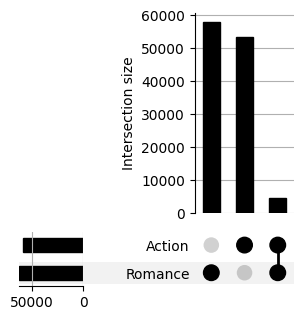

In [18]:
import matplotlib.pyplot as plt
import upsetplot

def plot_upset(genres_movies_set, movie_categories, filename):
    upset_data_sub = upsetplot.from_contents({
        k: v for k, v in genres_movies_set.items() if k.startswith(movie_categories)
    })

    upsetplot.plot(upset_data_sub)

    plt.savefig(filename, bbox_inches='tight')

grafico = plot_upset(
    genres_movies_set,
    ('Action', 'Romance'),
    "./UpSet - Visualizing Intersecting Sets.png"
)
